In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/BIKE DETAILS.csv")

In [6]:
#Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

print("First 10 rows of the dataset:\n")
print(df.head(10))

print("\nShape of the dataset:")
print(df.shape)

print("\nColumn names:")
print(df.columns.tolist())

First 10 rows of the dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN

In [10]:
# Check for missing values in all columns and describe your approach for handling them.
# Check for missing values in all columns
print("Missing values in each column:\n")
print(df.isnull().sum())


# Approach for handling the missing data
# 1. if it's not crucial then Drop the column
# 2. If it’s important then we  Try advanced imputation (mean/median, group-based mean, or predictive modeling)
# ex_showroom_price is important cloumn for data so we try 2 Approach



Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


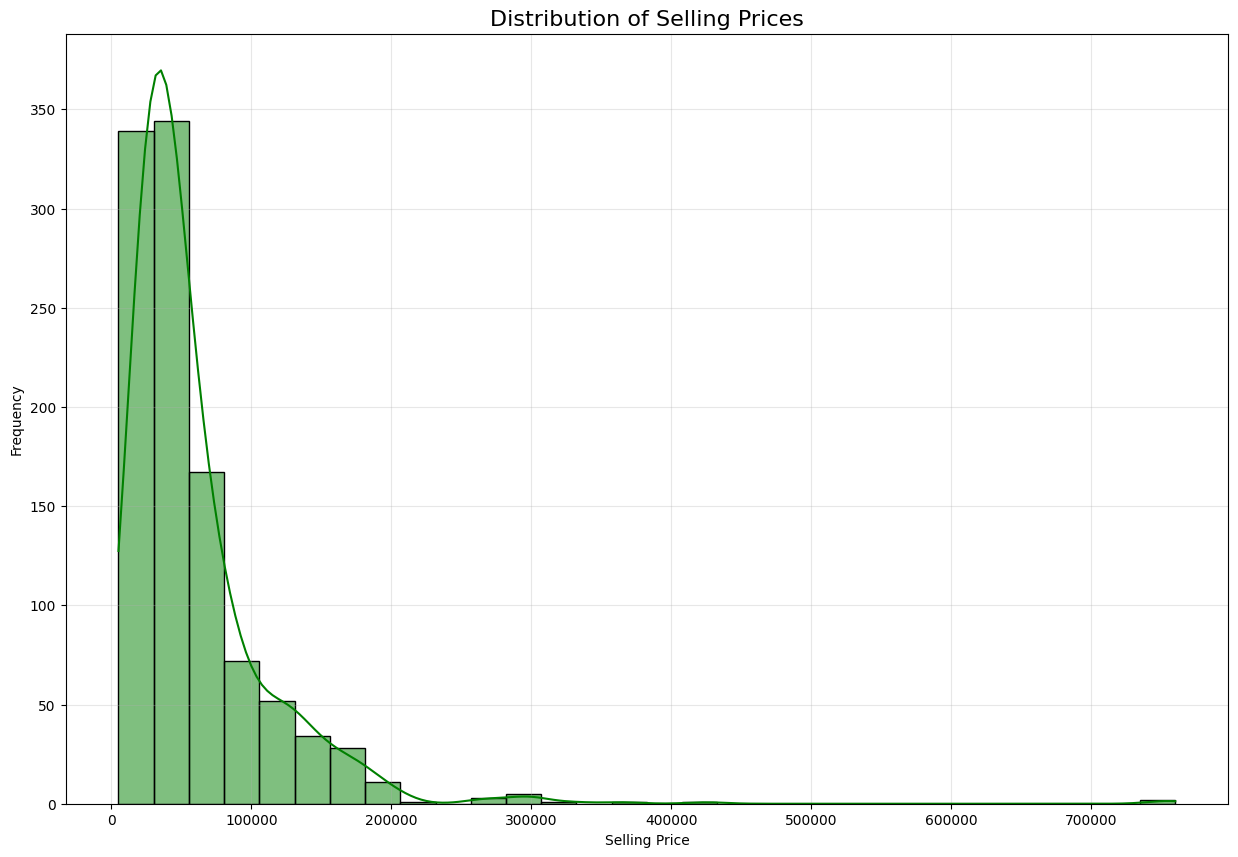

In [15]:
#Plot the distribution of selling prices using a histogram and describe the overall trend.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.histplot(df['selling_price'], bins=30, kde=True, color='green')

plt.title('Distribution of Selling Prices', fontsize=16)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


/tmp/ipython-input-1878842228.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='viridis')


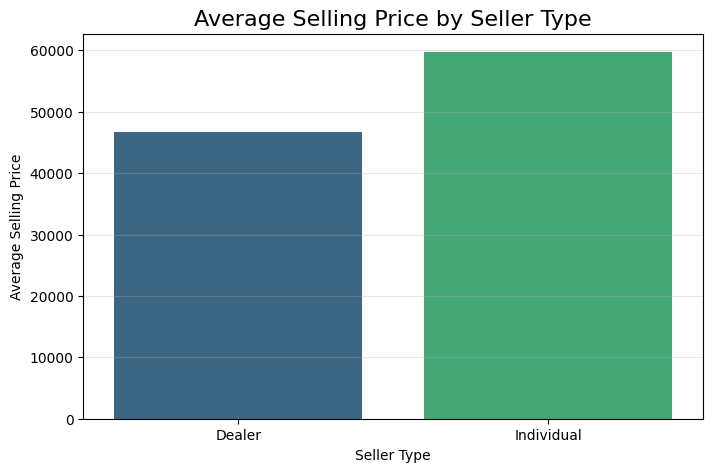

In [17]:
# Create a bar plot to visualize the average selling price for each seller_type and write one observation.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average selling price for each seller_type
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Plot bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='viridis')

plt.title('Average Selling Price by Seller Type', fontsize=16)
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.grid(axis='y', alpha=0.3)
plt.show()


#From the bar plot,
# we can observe that bikes sold by dealers typically have a higher average selling price compared to those sold by individual sellers because dealers often sell well-maintained, certified, or slightly premium bikes, whereas individual sellers may list bikes at more affordable prices.


/tmp/ipython-input-3303807233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=avg_km, palette='coolwarm')


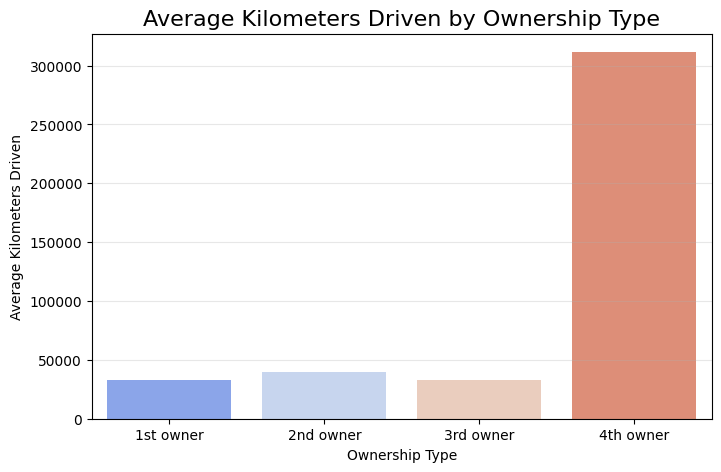

In [18]:
#Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()

# Plot bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='owner', y='km_driven', data=avg_km, palette='coolwarm')

plt.title('Average Kilometers Driven by Ownership Type', fontsize=16)
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.grid(axis='y', alpha=0.3)
plt.show()


In [22]:
# Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

# Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")

# Remove outliers
df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nAfter removing outliers:")
print(df_clean['km_driven'].describe())


Number of outliers detected: 39

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


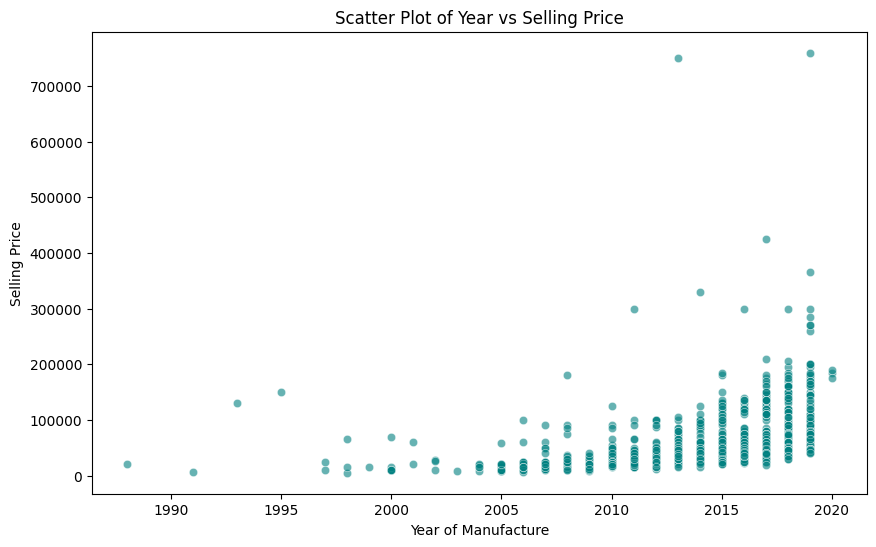

In [24]:
#  Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price


plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6, color='teal')
plt.title("Scatter Plot of Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()


In [28]:
#Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

# One-hot encode the seller_type column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

# Display the first 5 rows
print(df.head(5))


                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  


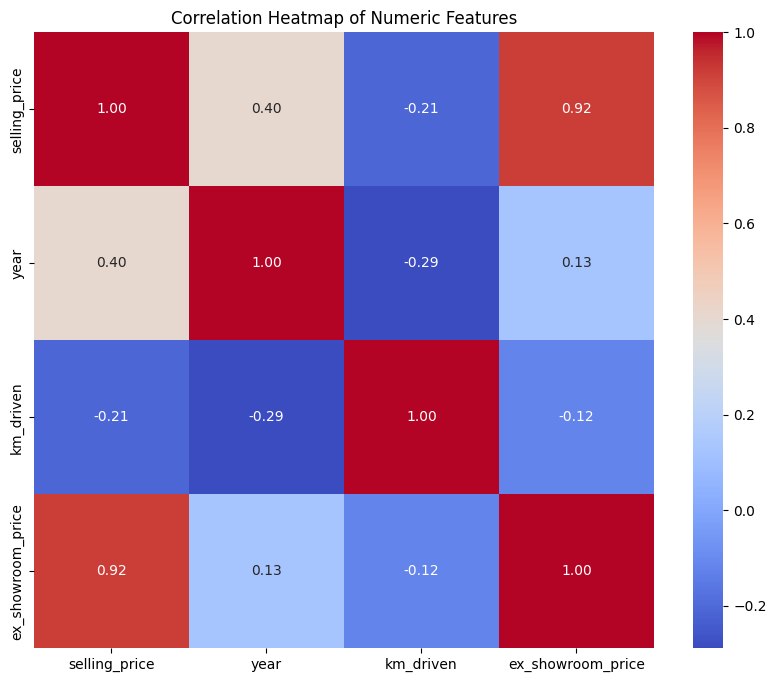

In [31]:
#Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

Bike Selling Price Analysis Report
(A). Most Important Factors Affecting Selling Price
Based on the analysis and visualizations:
1. Year of Manufacture (year)
-Newer bikes tend to have higher selling prices
catter plots and correlation analysis show a strong positive relationship with selling price
2. Kilometers Driven (km_driven)
-Bikes with higher km driven typically sell for less.
-Outliers in this column can distort the trend, so cleaning was essential.
-Shows a negative correlation with selling price.
3. Seller Type (seller_type)
-Bikes sold by Dealers have higher average selling prices than those sold by Individuals.
-One-hot encoding was performed to make this feature numeric for modeling.
4.Ownership (owner)
-1st owner bikes have lower average kilometers and slightly higher prices compared to 2nd or 3rd owner bikes.
-Highlights how previous ownership impacts depreciation.
5.Other Factors
-Other numeric features such as engine size, mileage, and power had weaker correlations with price.

(B) Data Cleaning and Feature Engineering
1. Missing Values
2. Outlier Removal
3. Encoding Categorical Variables
4. Visualization Insights

Key Observations
1. Selling price is strongly influenced by bike age and usage.
2. Dealer-sold bikes are generally more expensive than individually sold bikes.
3. Removing outliers and encoding categorical variables are essential steps to prepare the data for modeling.
